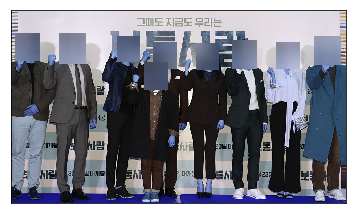

In [60]:
import numpy as np
import tensorflow as tf
import facenet
import cv2
import matplotlib.pyplot as plt

threshold = [ 0.6, 0.7, 0.7 ]
factor = 0.709
margin = 32

with tf.Graph().as_default():
        sess = tf.Session()
        with sess.as_default():
            pnet, rnet, onet = facenet.src.align.detect_face.create_mtcnn(sess, None)
            
img = cv2.imread("manypeople.jpg")
# img = facenet.to_rgb(img)
img = img[ : , : , 0 : 3]

bounding_boxes, _ = facenet.src.align.detect_face.detect_face(img, 20, pnet, rnet, onet, threshold, factor)
nrof_faces = bounding_boxes.shape[0]

if nrof_faces > 0:
    det = bounding_boxes[ : , 0 : 4]
    det_arr = []
    img_size = np.asarray(img.shape)[0 : 2]
    if nrof_faces > 1:
#         if args.detect_multiple_faces:
            for i in range(nrof_faces):
                det_arr.append(np.squeeze(det[i]))
#         else:
#             bounding_box_size = (det[ : , 2] - det[ : , 0]) * (det[ : , 3] - det[ : , 1])
#             img_center = img_size / 2
#             offsets = np.vstack([(det[ : , 0] + det[ : , 2]) / 2 - img_center[1], 
#                                  (det[ : , 1] + det[ : , 3]) / 2 - img_center[0]])
#             offset_dist_squared = np.sum(np.power(offsets, 2.0), 0)
#             index = np.argmax(bounding_box_size - offset_dist_squared * 2.0)
#             det_arr.append(det[index, : ])
    else:
        det_arr.append(np.squeeze(det))
    
    
for i, det in enumerate(det_arr):
    det = np.squeeze(det)
    bb = np.zeros(4, dtype = np.int32)
    
    bb[0] = np.maximum(det[0] - margin / 2, 0)
    bb[1] = np.maximum(det[1] - margin / 2, 0)
    bb[2] = np.minimum(det[2] + margin / 2, img_size[1])
    bb[3] = np.minimum(det[3] + margin / 2, img_size[0])
    
    cropped = img[bb[1] : bb[3], bb[0] : bb[2], : ]
    face_image = cv2.GaussianBlur(cropped, (99, 99), 30)
    img[bb[1] : bb[3], bb[0] : bb[2]] = face_image
    
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()